# Exercice 2 : arbre de décision 

In [1]:
import pandas as pd
import numpy as np
from math import log2

# Creer le tableau de donnees
data = [
    [5, 'Vidéo', 'Non'],
    [5, 'Image', 'Oui'],
    [10, 'Vidéo', 'Oui'],
    [15, 'Image', 'Non'],
    [20, 'Image', 'Oui'],
    [25, 'Vidéo', 'Oui'],
    [30, 'Image', 'Oui']
]
df = pd.DataFrame(data, columns=['Duree', 'Type', 'Clic'])
df


,Duree,Type,Clic
0,5,Vidéo,Non
1,5,Image,Oui
2,10,Vidéo,Oui
3,15,Image,Non
4,20,Image,Oui
5,25,Vidéo,Oui
6,30,Image,Oui


In [2]:
# Calculer entropie totale
valeurs = df['Clic'].value_counts()
print("Valeurs et leurs comptes :", valeurs)
total = len(df['Clic']) #7
print("\nTotal des exemples :", total)
entropie_totale = 0
for nb in valeurs:
    p = nb / total
    print("p =", round(p, 3))
    entropie_totale -= p * log2(p)
print("\nEntropie totale :", round(entropie_totale, 3))


Valeurs et leurs comptes : Clic
Oui    5
Non    2
Name: count, dtype: int64

Total des exemples : 7
p = 0.714
p = 0.286

Entropie totale : 0.863


In [3]:

# Calculer le gain information pour la publicité

# Calculer entropie pour Vidéo
groupe_video = df[df['Type'] == 'Vidéo']
total_video = len(groupe_video)
print("\nTotal pour Vidéo :", total_video)
clic_video = groupe_video['Clic'].value_counts()
print("Clic pour Vidéo :", clic_video)
entropie_video = 0
for nb in clic_video:
    p = nb / total_video
    print("p =", round(p, 3))
    entropie_video -= p * log2(p)
print("Entropie pour Vidéo :", round(entropie_video, 3))

# Calculer entropie pour Image
groupe_image = df[df['Type'] == 'Image']
total_image = len(groupe_image)
print("\nTotal pour Image :", total_image)
valeurs_image = groupe_image['Clic'].value_counts()
print("Clic pour Image :", valeurs_image)
entropie_image = 0
for nb in valeurs_image:
    p = nb / total_image
    print("p =", round(p, 3))
    entropie_image -= p * log2(p)
print("Entropie pour Image :", round(entropie_image, 3))

# Moyenne ponderee des entropies
entropie_type = (total_video / total) * entropie_video \
                + (total_image / total) * entropie_image
gain_type = entropie_totale - entropie_type
print("\nGain d'information (Type) :", round(gain_type, 3))


Total pour Vidéo : 3
Clic pour Vidéo : Clic
Oui    2
Non    1
Name: count, dtype: int64
p = 0.667
p = 0.333
Entropie pour Vidéo : 0.918

Total pour Image : 4
Clic pour Image : Clic
Oui    3
Non    1
Name: count, dtype: int64
p = 0.75
p = 0.25
Entropie pour Image : 0.811

Gain d'information (Type) : 0.006


In [4]:
# Categorisation de la durée
df['Duree_cat'] = np.where(df['Duree'] <= 15, '15_et_moins', 'plus_que_15')

# Calculer l'entropie pour Durée = '15_et_moins'
groupe_15_et_moins = df[df['Duree_cat'] == '15_et_moins']
print(groupe_15_et_moins)
nbr_total_15_et_moins = len(groupe_15_et_moins)
print(nbr_total_15_et_moins)
valeurs_15_et_moins = groupe_15_et_moins['Clic'].value_counts()
print(valeurs_15_et_moins)
entropie_15_et_moins = 0
for nb in valeurs_15_et_moins:
    p = nb / nbr_total_15_et_moins
    # On calcule la proportion Oui ou Non
    entropie_15_et_moins -= p * log2(p)

print("Entropie pour 15_et_moins :", round(entropie_15_et_moins, 3))

   Duree   Type Clic    Duree_cat
0      5  Vidéo  Non  15_et_moins
1      5  Image  Oui  15_et_moins
2     10  Vidéo  Oui  15_et_moins
3     15  Image  Non  15_et_moins
4
Clic
Non    2
Oui    2
Name: count, dtype: int64
Entropie pour 15_et_moins : 1.0


In [5]:
# Calculer entropie pour Duree = plus_que_15
groupe_plus_que_15 = df[df['Duree_cat'] == 'plus_que_15']
print(groupe_plus_que_15)
nb_total_plus_que_15 = len(groupe_plus_que_15)
print(nb_total_plus_que_15)
valeurs_plus_que_15 = groupe_plus_que_15['Clic'].value_counts()
print(valeurs_plus_que_15)
entropie_plus_que_15 = 0
for nb in valeurs_plus_que_15:
    p = nb / nb_total_plus_que_15
    entropie_plus_que_15 -= p * log2(p)
print("Entropie pour plus_que_15 :", round(entropie_plus_que_15, 3))

   Duree   Type Clic    Duree_cat
4     20  Image  Oui  plus_que_15
5     25  Vidéo  Oui  plus_que_15
6     30  Image  Oui  plus_que_15
3
Clic
Oui    3
Name: count, dtype: int64
Entropie pour plus_que_15 : 0.0


In [6]:
# Moyenne ponderee des entropies
entropie_duree = (nbr_total_15_et_moins / total) * entropie_15_et_moins + (nb_total_plus_que_15 / total) * entropie_plus_que_15
gain_duree = entropie_totale - entropie_duree
print("Gain d'information (Durée) :", round(gain_duree, 3))

Gain d'information (Durée) : 0.292


In [7]:
# Choisir le noeud racine optimal
print("Gain d'information pour publicité :", round(gain_type, 3))
print("Gain d'information pour Durée     :", round(gain_duree, 3))
if gain_type > gain_duree:
    print("Le noeud racine optimal est publicité")
else:
    print("Le noeud racine optimal est Durée ")

Gain d'information pour publicité : 0.006
Gain d'information pour Durée     : 0.292
Le noeud racine optimal est Durée 


In [8]:
# Predire pour un client de 15 minutes et pub vidéo
pred_video = groupe_15_et_moins[groupe_15_et_moins['Type'] == 'Vidéo']
print(pred_video)

nb_oui = (pred_video['Clic'] == 'Oui').sum()
print(nb_oui)
nb_non = (pred_video['Clic'] == 'Non').sum()
print(nb_non)

if nb_oui > nb_non:
    print("Prédiction : Oui, le client va cliquer sur la publicité.")
else:
    print("Prédiction : Non, le client ne va pas cliquer sur la publicité.")

   Duree   Type Clic    Duree_cat
0      5  Vidéo  Non  15_et_moins
2     10  Vidéo  Oui  15_et_moins
1
1
Prédiction : Non, le client ne va pas cliquer sur la publicité.


# Exercice 3 :  Régression Linéaire

### Question 1 :

,experience,niveau_education,salaire
0,6,3,53.77
1,19,1,73.65
2,14,4,86.06
3,10,2,66.17
4,7,4,54.63


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   experience        50 non-null     int64  
 1   niveau_education  50 non-null     int64  
 2   salaire           50 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.3 KB
None


,count,mean,std,min,25%,50%,75%,max
experience,50.0,10.9600,6.343758,0.00,6.0000,11.00,17.00,20.00
niveau_education,50.0,2.8400,1.447870,1.00,2.0000,3.00,4.00,5.00
salaire,50.0,65.7218,17.305129,28.01,54.0325,66.32,78.48,95.35


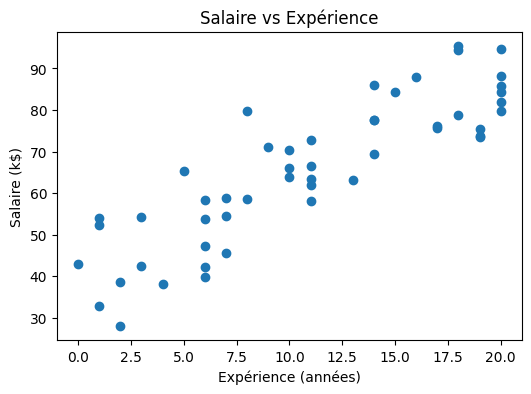

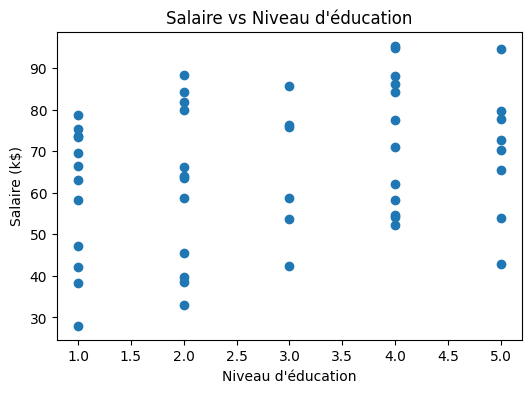

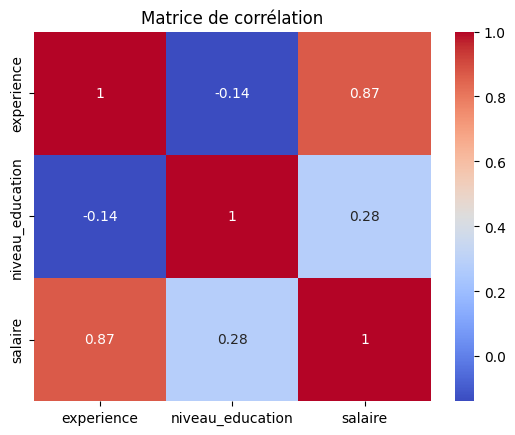

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
df = pd.read_csv('salaires_donnees.csv')
display(df.head())
print(df.info())
display(df.describe().T)
# Graphe salaire vs expérience
plt.figure(figsize=(6,4))
plt.scatter(df['experience'], df['salaire'])
plt.xlabel('Expérience (années)')
plt.ylabel('Salaire (k$)')
plt.title('Salaire vs Expérience')
plt.show()

# Graphe salaire vs niveau_education
plt.figure(figsize=(6,4))
plt.scatter(df['niveau_education'], df['salaire'])
plt.xlabel('Niveau d\'éducation')
plt.ylabel('Salaire (k$)')
plt.title('Salaire vs Niveau d\'éducation')
plt.show()

# Matrice de corrélation
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

- Les points montrent une tendance croissante entre l'expérience et le salaire: plus l'expérience augmente, plus le salaire est élevé.
- La matrice de corrélation indique une forte corrélation positive de 0.87 entre salaire et expérience.
- Cela signifie que l'expérience est un facteur important pour expliquer le salaire.

### Question 2 : 

1. prétraitement des données : Vérifier et nettoyer les données (valeurs manquantes, types, doublons).
2. Choix des prédicteurs et target, `experience` et `niveau_education`, target est `salaire`
3. Entraînement du modèle : Utiliser une régression linéaire.
5. Évaluer le modèle : Calculer les métriques (RMSE, R²) pour juger la qualité de la prédiction.

### Question 3 :

In [10]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Séparation train/test
X = df[['experience', 'niveau_education']]
y = df['salaire']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner le modèle sur train
model = LinearRegression()
model.fit(X_train, y_train)

# Afficher l'équation
coef_experience = model.coef_[0]
coef_education = model.coef_[1]
salaire_min = model.intercept_
print(f"Équation : salaire = {coef_experience:.2f} x experience + {coef_education:.2f} x niveau_education + {salaire_min:.2f}")

# Predictions sur test
y_pred = model.predict(X_test)

# Calculer RMSE et R2
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE de test : {rmse:.3f}")

r2 = r2_score(y_test, y_pred)
print(f"R2 de test : {r2:.3f}")


Équation : salaire = 2.58 x experience + 4.91 x niveau_education + 24.16
RMSE de test : 4.984
R2 de test : 0.913


- RMSE de test : 4.984
L’erreur moyenne entre les salaires réels et prédits est d’environ 4.98 k$.  
Plus le RMSE est petit, plus le modèle est précis.
- R2 de test : 0.913
Plus R2 est proche de 1, plus le modèle est performant.  
le modèle est très bon pour prédire le salaire.

### Question 4 :

In [11]:
valeur_experience = 8
valeur_education = 4

X_new = pd.DataFrame([[valeur_experience, valeur_education]], columns=['experience', 'niveau_education'])
display(X_new)
salaire_pred = model.predict(X_new)
print(f"Salaire prédit pour 8 ans d'expérience et niveau d'éducation 4 : {salaire_pred[0]:.2f} k$")

,experience,niveau_education
0,8,4


Salaire prédit pour 8 ans d'expérience et niveau d'éducation 4 : 64.39 k$


- Chaque année d’expérience augmente le salaire de 2.58 k$ en moyenne.
- Chaque niveau d’éducation supplémentaire augmente le salaire de 4.91 k$ en moyenne.
- 24.16 k$ est le salaire de base (quand expérience et niveau_education sont à zéro).
- En résumé : plus l’expérience et le niveau d’éducation sont élevés, plus le salaire prédit est important.